# Import/install libraries

In [1]:
import os
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

#import nltk
# nltk.download('stopwords')
# from nltk.corpus import stopwords
# !pip install stop-words
from stop_words import get_stop_words
# !pip install snowballstemmer
import snowballstemmer

from sklearn.preprocessing import LabelEncoder


import re

In [2]:
pd.options.display.max_colwidth = 1000

# Load data

In [3]:
data_root = os.path.join("/workspace/academy/assignment1", "data")

In [4]:
df_train = pd.read_parquet(os.path.join(data_root, "train.parquet"))

In [5]:
df_test = pd.read_parquet(os.path.join(data_root, "test.parquet"))

In [6]:
df_example = pd.read_parquet(os.path.join(data_root, "example_predictions.parquet"))

## Looking at loaded data

In [7]:
pd.options.display.max_colwidth = 1000

In [8]:
df_train.shape

(3861, 8)

In [9]:
df_test.shape

(946, 4)

In [10]:
df_example.shape

(5, 8)

In [11]:
df_train.head()

,uuid,description,color,price,cc3,sparkling,floral,striped
0,00_06db4_f7PKCScjE7iz9RccgKoYU8BG,beautiful summer dress by zara only worn once.\n\n#zara #zarawoman #zaradress #summerdress #dress,VARIOUS,8.40,DRESSES,False,True,False
1,00_074fe_d1wi5P39YxXsM3aYJWdToH2p,Maroon denim colored high rise jean shorts from Charlotte Russe size 2. Fits sizes 25-26 and goes up to right under belly button on a 5”7 tall person. Shorts are in good condition but there is slight wear as pictured in the back,BROWN,3.80,SHORTS_CAPRIS,False,False,False
2,0746f_viq17Xw4gBvYbmB1qKD5z6Z8,brand-new without tags x,VARIOUS,7.20,SHORTS_CAPRIS,False,True,False
3,00_069a4_PN8t6dcbp8PopRPnsBTp2MWv,"Vasariška trumpa lengva medvilninė suknytė, be defektų.\nIlgis 83cm, plotis tarp pažastų 37cm.\n#terranova #suknele #geleta",VARIOUS,2.00,DRESSES,False,True,False
4,00_05337_c3Lr3d3VjSyg6SXZALzZXkpd,"size small, worn; distressed look. one has a pain stain, see pics \nWILL THROW IN FREE W ANY BUNDLE IF ASKED \n#jsfcloset",RED,0.76,SHORTS_CAPRIS,False,False,False


In [12]:
df_test.head()

,uuid,description,color,price
0,00_04fec_bcBubyJW2q8o6JPFntUn4Q9W,"In great condition! No holes, stains or pilling. \n\nSize 26. \n\nStyle is Skinny Toothpick. \n\nMade of 99% cotton, 1% spandex. \n\nSmoke free home. All sales are final.\n\n#jcrew\n#corduroy\n#skinnyjeans",GREY,11.400
1,00_050a7_o9o8NLTcXJ7Hqs2t31xEGoG4,"šiek tiek praires užtrauktukas ,reiktų šiek tiek\nsuimt su siūlu . ne auksteniai nei 170cm \nPrašau neprašykite išmatavimų nuo pažasties iki klyno ir pan. Visi dydžiai yra standartiniai ,jei neparašyta kitaip. Nemainau.",WHITE,5.000
2,00_060f0_zLp2b8moCnfWX614ZAu8HfsS,This square neckline dress is so beautiful! It’s sheer and printed. It’s a pretty turquoise blue color. The back ties. It’s asymmetrical and ruched at one side. The brand is Cabi. Size small.,BLUE,26.600
3,00_05d49_74iqVSd8yami4Szoy5tBjkGF,"Maxi sukně ze zajímavého materiálu, tak trošku mění barvu na světle. Vysoký pas. Super objem, skoro princeznovská:)\n\n#dlouhasukne #maxisukne #sukne #zajímavý #zajímavá #zajimavabarva #material #lesklý #lesklá #extravagantni",PINK,4.668
4,00_06301_twfaovSeAmiJoFPWgAE9b99G,"Labai graži suknelė, yra maža dėmelė,kuri tikrak išsiplaus",BLACK,5.000


In [13]:
df_example.head()

,uuid,description,color,price,cc3,sparkling,floral,striped
0,00_06db4_f7PKCScjE7iz9RccgKoYU8BG,beautiful summer dress by zara only worn once.\n\n#zara #zarawoman #zaradress #summerdress #dress,VARIOUS,8.40,DRESSES,False,True,False
1,00_074fe_d1wi5P39YxXsM3aYJWdToH2p,Maroon denim colored high rise jean shorts from Charlotte Russe size 2. Fits sizes 25-26 and goes up to right under belly button on a 5”7 tall person. Shorts are in good condition but there is slight wear as pictured in the back,BROWN,3.80,SHORTS_CAPRIS,False,False,False
2,0746f_viq17Xw4gBvYbmB1qKD5z6Z8,brand-new without tags x,VARIOUS,7.20,SHORTS_CAPRIS,False,True,False
3,00_069a4_PN8t6dcbp8PopRPnsBTp2MWv,"Vasariška trumpa lengva medvilninė suknytė, be defektų.\nIlgis 83cm, plotis tarp pažastų 37cm.\n#terranova #suknele #geleta",VARIOUS,2.00,DRESSES,False,True,False
4,00_05337_c3Lr3d3VjSyg6SXZALzZXkpd,"size small, worn; distressed look. one has a pain stain, see pics \nWILL THROW IN FREE W ANY BUNDLE IF ASKED \n#jsfcloset",RED,0.76,SHORTS_CAPRIS,False,False,False


# Training df

## All df in general

### Duplicate rows

In [14]:
df_train.duplicated().sum()

66

In [15]:
df_train[df_train.duplicated(keep=False).values].set_index("uuid").sort_index().head(4)

,description,color,price,cc3,sparkling,floral,striped
uuid,,,,,,,
00_04e32_uA8Gveq8Cr43y9A8p6FNWjeR,">> až 15% sleva na sety <<\n\nProužkované lesklé šatky s háčkovaným horním okrajem a ramínky, mají spodničku, dobře vypadají s nějakým páskem. Materiál 95% viskoza, 5% kovová vlákna, podšívka polyester.\nVelikost S odpovídá. Délka 114 cm.\n\n>> více info v profilu <<\n\n#boho #hippie #mididress # #shimmer #crochet #mustard #spring #summer #autumn #viscose #zara",RED,11.6700,DRESSES,True,False,True
00_04e32_uA8Gveq8Cr43y9A8p6FNWjeR,">> až 15% sleva na sety <<\n\nProužkované lesklé šatky s háčkovaným horním okrajem a ramínky, mají spodničku, dobře vypadají s nějakým páskem. Materiál 95% viskoza, 5% kovová vlákna, podšívka polyester.\nVelikost S odpovídá. Délka 114 cm.\n\n>> více info v profilu <<\n\n#boho #hippie #mididress # #shimmer #crochet #mustard #spring #summer #autumn #viscose #zara",RED,11.6700,DRESSES,True,False,True
00_04ef6_pn2b1ydpsrw2TQLriG1uLm5q,nové:) Da se použit i jako Tunika :) \n,BLUE,15.5211,DRESSES,False,False,True
00_04ef6_pn2b1ydpsrw2TQLriG1uLm5q,nové:) Da se použit i jako Tunika :) \n,BLUE,15.5211,DRESSES,False,False,True


### Delete dublication

In [16]:
df_train = df_train[~df_train.duplicated()]

### Info

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3795 entries, 0 to 3277
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   uuid         3795 non-null   object 
 1   description  3795 non-null   object 
 2   color        3795 non-null   object 
 3   price        3795 non-null   float64
 4   cc3          3422 non-null   object 
 5   sparkling    3795 non-null   bool   
 6   floral       3795 non-null   bool   
 7   striped      3795 non-null   bool   
dtypes: bool(3), float64(1), object(4)
memory usage: 189.0+ KB


In [18]:
df_train.isna().sum()

uuid             0
description      0
color            0
price            0
cc3            373
sparkling        0
floral           0
striped          0
dtype: int64

## Column "uuid"

### This colum should be unique in all data column

In [19]:
df_train["uuid"].value_counts().ge(2).sum()

10

### Have 10 dublicated rows, lets look how they look, becouse they weren't deleted as full row dublicates

In [20]:
dt_train_only_same_uuid = df_train[df_train.duplicated(subset=["uuid"], keep=False)].sort_values(by="uuid")
dt_train_only_same_uuid

,uuid,description,color,price,cc3,sparkling,floral,striped
3007,00_04eaf_TVbYdLiveQeR7NruNvDBNF2Z,"prsa 38cm, délka 55cm, pružný",BROWN,3.89,None,False,False,True
3007,00_04eaf_TVbYdLiveQeR7NruNvDBNF2Z,"prsa 38cm, délka 55cm, pružný",BROWN,3.89,PULLOVERS_SWEATERS,False,False,True
1222,00_05414_gxmt8KnGmNoc2ngfV8goMSwf,- only worn a few times\n- destress at leg holes \n- some distress rips\nAny questions? Just contact me!,LIGHT-BLUE,5.32,SHORTS_CAPRIS,False,False,False
1222,00_05414_gxmt8KnGmNoc2ngfV8goMSwf,- only worn a few times\n- destress at leg holes \n- some distress rips\nAny questions? Just contact me!,LIGHT-BLUE,5.32,None,False,False,False
3277,00_0544f_pzMGTc8daECPZinQkkB1EP6w,"Never worn, A-line tie waist dress. Tags not attached.",BODY,7.60,None,False,True,False
3277,00_0544f_pzMGTc8daECPZinQkkB1EP6w,"Never worn, A-line tie waist dress. Tags not attached.",BODY,7.60,DRESSES,False,True,False
1719,00_05b4e_usebeyzYnoyRwH4MbvarXGyd,"Uzsideta viena karta per naujuju metu svente. Labai tampri medziaga rausva su blizgeliu. Tarp pazastu laisvumo busenoje 100 cm ir tempiasi gal iki 140 cm, ilgis nuo peties iki apacios 85 cm. Medziagele persisviecia, bet maloni prie kuno. Jei reikia galiu siusti per pastomata.",ROSE,8.00,None,True,False,False
1719,00_05b4e_usebeyzYnoyRwH4MbvarXGyd,"Uzsideta viena karta per naujuju metu svente. Labai tampri medziaga rausva su blizgeliu. Tarp pazastu laisvumo busenoje 100 cm ir tempiasi gal iki 140 cm, ilgis nuo peties iki apacios 85 cm. Medziagele persisviecia, bet maloni prie kuno. Jei reikia galiu siusti per pastomata.",ROSE,8.00,DRESSES,True,False,False
3769,00_05cb8_CUufbE6EiSvET1F9aQq51Rbo,Great condition\nSize medium\nZippers on side,BLACK,11.40,None,False,False,True
3769,00_05cb8_CUufbE6EiSvET1F9aQq51Rbo,Great condition\nSize medium\nZippers on side,BLACK,11.40,DRESSES,False,False,True


### It looks that only thing that different theme from being completely duplicate is "cc3" column with None values

In [21]:
df_train_no_cc3_duplic = df_train[df_train.loc[:, df_train.columns != "cc3"].duplicated(keep=False)].sort_values(by="uuid")
df_train_no_cc3_duplic

,uuid,description,color,price,cc3,sparkling,floral,striped
3007,00_04eaf_TVbYdLiveQeR7NruNvDBNF2Z,"prsa 38cm, délka 55cm, pružný",BROWN,3.89,None,False,False,True
3007,00_04eaf_TVbYdLiveQeR7NruNvDBNF2Z,"prsa 38cm, délka 55cm, pružný",BROWN,3.89,PULLOVERS_SWEATERS,False,False,True
1222,00_05414_gxmt8KnGmNoc2ngfV8goMSwf,- only worn a few times\n- destress at leg holes \n- some distress rips\nAny questions? Just contact me!,LIGHT-BLUE,5.32,SHORTS_CAPRIS,False,False,False
1222,00_05414_gxmt8KnGmNoc2ngfV8goMSwf,- only worn a few times\n- destress at leg holes \n- some distress rips\nAny questions? Just contact me!,LIGHT-BLUE,5.32,None,False,False,False
3277,00_0544f_pzMGTc8daECPZinQkkB1EP6w,"Never worn, A-line tie waist dress. Tags not attached.",BODY,7.60,None,False,True,False
3277,00_0544f_pzMGTc8daECPZinQkkB1EP6w,"Never worn, A-line tie waist dress. Tags not attached.",BODY,7.60,DRESSES,False,True,False
1719,00_05b4e_usebeyzYnoyRwH4MbvarXGyd,"Uzsideta viena karta per naujuju metu svente. Labai tampri medziaga rausva su blizgeliu. Tarp pazastu laisvumo busenoje 100 cm ir tempiasi gal iki 140 cm, ilgis nuo peties iki apacios 85 cm. Medziagele persisviecia, bet maloni prie kuno. Jei reikia galiu siusti per pastomata.",ROSE,8.00,None,True,False,False
1719,00_05b4e_usebeyzYnoyRwH4MbvarXGyd,"Uzsideta viena karta per naujuju metu svente. Labai tampri medziaga rausva su blizgeliu. Tarp pazastu laisvumo busenoje 100 cm ir tempiasi gal iki 140 cm, ilgis nuo peties iki apacios 85 cm. Medziagele persisviecia, bet maloni prie kuno. Jei reikia galiu siusti per pastomata.",ROSE,8.00,DRESSES,True,False,False
3769,00_05cb8_CUufbE6EiSvET1F9aQq51Rbo,Great condition\nSize medium\nZippers on side,BLACK,11.40,None,False,False,True
3769,00_05cb8_CUufbE6EiSvET1F9aQq51Rbo,Great condition\nSize medium\nZippers on side,BLACK,11.40,DRESSES,False,False,True


### It looks the same, lets check it 

In [22]:
dt_train_only_same_uuid.equals(df_train_no_cc3_duplic)

True

### Remove from df_train rows with duplicated "uuid" and "cc3" == None

In [23]:
duplic_index = list(df_train_no_cc3_duplic[df_train_no_cc3_duplic["cc3"].isna()].index)

In [24]:
df_train.drop(duplic_index, inplace=True)

### Look again in "uuid" duplicates

In [25]:
df_train["uuid"].value_counts().ge(2).sum()

0

## If all "uuid" from df_train are in "photos" folder

### Create df of photos names

In [26]:
images_names = pd.DataFrame({"uuid" : list(os.listdir(os.path.join(data_root, "photos")))})

In [27]:
images_names.head()

,uuid
0,00_04e25_8szf1Q1etszF4tRDvXwuh8e5.jpeg
1,00_04e26_DF4FKTRubmxnUj7LTi2aWqz5.jpeg
2,00_04e27_Fg7gWJD7D3djQAsU2XsZb1F2.jpeg
3,00_04e27_rYvQm4SdjRZwxgvWezRtmBqK.jpeg
4,00_04e2a_JdxtpYpFmHNLrieuPSBqEqnM.jpeg


### Look if all image formats are the same

In [28]:
images_names["format"] = images_names["uuid"].str.findall(r"(?<=\.).*")

In [29]:
images_names.head()

,uuid,format
0,00_04e25_8szf1Q1etszF4tRDvXwuh8e5.jpeg,[jpeg]
1,00_04e26_DF4FKTRubmxnUj7LTi2aWqz5.jpeg,[jpeg]
2,00_04e27_Fg7gWJD7D3djQAsU2XsZb1F2.jpeg,[jpeg]
3,00_04e27_rYvQm4SdjRZwxgvWezRtmBqK.jpeg,[jpeg]
4,00_04e2a_JdxtpYpFmHNLrieuPSBqEqnM.jpeg,[jpeg]


In [30]:
images_names["format"].explode().unique()

array(['jpeg'], dtype=object)

### Remove format from "uuid"

In [31]:
images_names["uuid"] = images_names["uuid"].str.replace(r"\..*", "")
images_names.head()

,uuid,format
0,00_04e25_8szf1Q1etszF4tRDvXwuh8e5,[jpeg]
1,00_04e26_DF4FKTRubmxnUj7LTi2aWqz5,[jpeg]
2,00_04e27_Fg7gWJD7D3djQAsU2XsZb1F2,[jpeg]
3,00_04e27_rYvQm4SdjRZwxgvWezRtmBqK,[jpeg]
4,00_04e2a_JdxtpYpFmHNLrieuPSBqEqnM,[jpeg]


### Check if all df_train "uuid" elements are in "photos" folder

In [32]:
df_train["uuid"].isin(images_names["uuid"]).value_counts()

True    3775
Name: uuid, dtype: int64

## Column "sparkling", "floral" and "striped"

### Looking for NaN values

In [33]:
df_train["sparkling"].value_counts(dropna=False)

False    3357
True      418
Name: sparkling, dtype: int64

In [34]:
df_train["floral"].value_counts(dropna=False)

False    2429
True     1346
Name: floral, dtype: int64

In [35]:
df_train["striped"].value_counts(dropna=False)

False    2879
True      896
Name: striped, dtype: int64

## Column "price"

In [36]:
df_train["price"].describe()

count    3775.000000
mean       11.071408
std        14.936901
min         0.038900
25%         4.800000
50%         7.600000
75%        12.160000
max       592.800000
Name: price, dtype: float64

In [37]:
df_train["price"].isna().sum()

0

# Main this assigment columns "cc3" and "description"

## Column "cc3"

In [38]:
df_train_cc3 = df_train["cc3"].value_counts(normalize=True, dropna=False).reset_index()
df_train_cc3["index"].fillna("MISSING", inplace=True)
df_train_cc3

,index,cc3
0,DRESSES,0.440795
1,TROUSERS,0.135629
2,SHORTS_CAPRIS,0.125563
3,SKIRTS,0.116821
4,MISSING,0.096159
5,PULLOVERS_SWEATERS,0.085033


Text(0, 0.5, 'Category of the item')

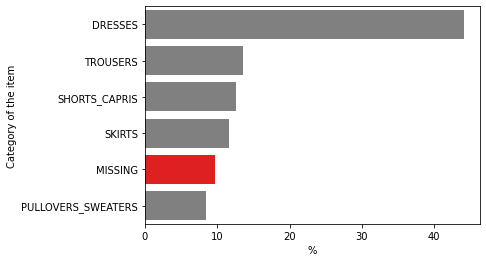

In [39]:
clrs = ["grey" if col_name != "MISSING" else "red" for col_name in df_train_cc3["index"].values]

sns.barplot(y=df_train_cc3["index"], x=df_train_cc3["cc3"] * 100, palette=clrs)
plt.xlabel("%")
plt.ylabel("Category of the item")

### Have a lot Missing data, almost the same amount as majority of other categories (except DRESSES)
#### For this time we delete all missing values

In [40]:
df_train.dropna(subset=["cc3"], inplace=True)

### Encode labels

In [41]:
le = LabelEncoder()

In [42]:
df_train["cc3_encoded"] = le.fit_transform(df_train["cc3"])

## Column "description"

### Pre-processing

In [43]:
VINTED_LANGUAGES = ["lithuanian", "polish", "czech", "french", "dutch", "german", "english", "spanish"]

In [44]:
def stop_word_generator(languages):
    """
        languages: list of languages
        
        return: set of stop words
    """
    all_stop_words = []
    for language in languages:
        try:
             stop_words = get_stop_words(language)
        except:
            pass
        else:
            all_stop_words += stop_words
    return set(all_stop_words)

In [45]:
STOPWORDS = stop_word_generator(VINTED_LANGUAGES)

In [46]:
def clean_text(text, stop_words):
#     global STOPWORDS
    """
        text: a string
        
        return: modified initial string
    """
    stemmer = snowballstemmer.stemmer('english')
    text = text.lower()
#     text = re.sub(r"\W|\d|\b\w{1,3}\b", " ", text)
    text = re.sub(r"\d", " ", text)
    text = re.sub(r"\W", " ", text)
    text = re.sub(r"\b\w{1,3}\b", " ", text)
    text = " ".join(stemmer.stemWords((word for word in text.split() if word not in stop_words)))

    return text
    

In [47]:
df_train["description_proc"] = df_train["description"].apply(clean_text, stop_words=STOPWORDS)

### Counting Pre-processed description words

In [48]:
df_train["escription_proc_len"] = df_train["description_proc"].str.split().str.len()

In [62]:
df_train["escription_proc_len"].value_counts().head(10)

5     217
2     214
4     214
6     214
3     205
7     194
8     178
10    160
9     157
11    130
Name: escription_proc_len, dtype: int64

#### Delete rows that don't have any description

In [50]:
df_train = df_train[~(df_train['escription_proc_len'] == 0)]

In [51]:
df_train.to_csv(os.path.join(data_root, "train_preproc.csv"), index=False)

In [68]:
df_train_minus2 = df_train[df_train["escription_proc_len"] > 2]

In [70]:
df_train_minus2.to_csv(os.path.join(data_root, "train_preproc_minus2.csv"), index=False)

In [49]:
df_train[ df_train["escription_proc_len"] < 3][["description","description_proc", "cc3"]]

,description,description_proc,cc3
8,"nové, neunosila jsem",nové neunosila,DRESSES
9,very good condition,good condit,DRESSES
11,Neunosim,neunosim,PULLOVERS_SWEATERS
16,never worn,never worn,DRESSES
43,worn once,worn,DRESSES
...,...,...,...
3704,Dzinsiniai sortai.,dzinsiniai sortai,SHORTS_CAPRIS
3713,has some fake tan stains,fake stain,TROUSERS
3716,Never been worn,never worn,SHORTS_CAPRIS
3717,v dobrem stavu,dobrem stavu,TROUSERS


## Random under and over sampling

In [52]:
count_class_0, count_class_1, count_class_2, count_class_3, count_class_4 = df_train["cc3"].value_counts()
df_class_0 = df_train[df_train['cc3'] == "DRESSES"]
df_class_1 = df_train[df_train['cc3'] == "TROUSERS"]
df_class_2 = df_train[df_train['cc3'] == "SHORTS_CAPRIS"]
df_class_3 = df_train[df_train['cc3'] == "SKIRTS"]
df_class_4 = df_train[df_train['cc3'] == "PULLOVERS_SWEATERS"]

### Random under-sampling

In [53]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1, df_class_2, df_class_3, df_class_4], axis=0).sample(frac=1)

Text(0, 0.5, 'Number of items')

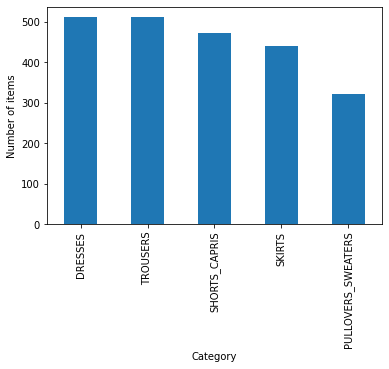

In [54]:
df_test_under["cc3"].value_counts(dropna=False).plot.bar(rot=0)
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Number of items")

#### Save df for Modeling

In [55]:
df_test_under.to_csv(os.path.join(data_root, "train_preproc_under.csv"), index=False)

## Random over-sampling

In [56]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_class_2_over = df_class_2.sample(count_class_0, replace=True)
df_class_3_over = df_class_3.sample(count_class_0, replace=True)
df_class_4_over = df_class_4.sample(count_class_0, replace=True)

In [57]:
df_test_over = pd.concat([df_class_0, df_class_1_over, df_class_2_over, df_class_3_over, df_class_4_over], axis=0).sample(frac=1)

Text(0, 0.5, 'Number of items')

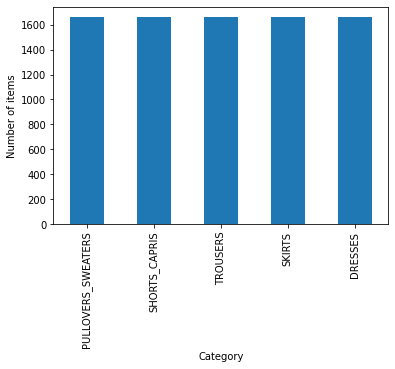

In [58]:
df_test_over["cc3"].value_counts(dropna=False).plot.bar(rot=0)
plt.xticks(rotation=90)
plt.xlabel("Category")
plt.ylabel("Number of items")

#### Save df for Modeling

In [59]:
df_test_over.to_csv(os.path.join(data_root, "train_preproc_over.csv"), index=False)